# Degree distribution

In [4]:
# Input: A graph 
# Output: find degrees and plot their distribution
def Degree_Distribution(G):
    degree = G.degree()
    degree = [ deg for (v,deg) in degree ]
    plot_distribution(degree, xlabel='Degree ($k$)', 
                  ylabel='Number of nodes with degree $k$ ($N_k$)', title='Degree distributions')

# Connected components analysis

In [5]:
# Input: A graph 
# Find the sizes of all connected components and plot the distribution
def CC_Distribution(G):
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)
    # print statistics of the top 5 components (if exist)
    topcc = min(len(cc_sorted), 5)
    for i in  range(topcc):
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
        n = cc_graph.number_of_nodes()
        m = cc_graph.number_of_edges()
        n_percent = (n/G.number_of_nodes()) * 100
        print("Largest component #", i+1)
        print("Number of vertices:", n, " (", n_percent, ")", "\nNumber of edges: ", m, "\n")

    cc_sizes = [len(c) for c in cc_sorted]
    plot_distribution(cc_sizes, xlabel='Weakly connected component size', 
                  ylabel='Count', title='Connected component size distributions')



# Clustering coefficient analysis

In [6]:
# Input: A graph 
# Find the local clustering coefficient of all vertices and plot distribution
def Clustering_Analysis(G):
    clust = nx.clustering(G)
    local_clust_coefficient = [ v for v in clust.values() ]
    avg_clust_coefficient = sum(local_clust_coefficient)/G.number_of_nodes()
    print("Average clustering coefficient: ", avg_clust_coefficient)
    #plot the distribution of clustering coefficient
    plot_distribution(local_clust_coefficient, xlabel='Clustering coefficient', 
                  ylabel='Number of vertices', title='Clustering coefficient distributions',
                      xlog=False, ylog=True, showLine=False)
    

# Shortest path analysis

In [7]:
# Input: A graph 
# Find shortest paths in the largest 5 componets and plot distribution


def ShortestPaths_Analysis(G):
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)

    # find shortest paths in top 5 components
    topcc = min(len(cc_sorted), 5)
    for i in  range(topcc) :
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
      
        if(len(cc)>30000):
            print("This component is too large. Using ten single-source shortest paths.")
            cc = list(cc)
            cc_graph = G.subgraph(cc)
            shortest_path_lens = []
            for i in range(10):
                length = nx.single_source_shortest_path_length(cc_graph, cc[i]) 
                shortest_path_lens += [ v for v in length.values() ]
        else:
            all_shortest_path_dict = dict(nx.all_pairs_shortest_path_length(cc_graph))
            shortest_path_lens = []
            for val1 in all_shortest_path_dict.values():
                for val in val1.values():
                    shortest_path_lens.append(val)
        
        plot_distribution(shortest_path_lens, xlabel='Shortest path lengths (hops)', 
                  ylabel='Number of paths', title='Shortest path lengths distributions',
                      xlog=False, ylog=False, showLine=True, intAxis=True)
    
    
    

        

# Helper functions for plotting

In [8]:


import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('ggplot')
#plt.style.use('seaborn-ticks')
#plt.style.use('seaborn-notebook')
plt.rcParams['lines.linewidth']=3
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=14

    
def plot_distribution (data, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False) :
    counts = {}
    for item in data :
        if item not in counts :
            counts [ item ] = 0
        counts [ item ] += 1
    counts = sorted ( counts.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.scatter ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if(len(counts)<20):  # for tiny graph
        showLine=True
    if showLine==True:
        ax.plot ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if xlog == True:
        ax.set_xscale ( 'log')
    if ylog == True:
        ax.set_yscale ( 'log')
    if intAxis == True:
        gca = fig.gca()
        gca.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel ( xlabel)
    ax.set_ylabel ( ylabel )
    plt.title ( title )
    #fig.savefig ( "degree_distribution.png" )
    
def plot_degree_bar (G) :
    degs = {}
    for n in G.nodes () :
        deg = G.degree ( n )
        if deg not in degs :
            degs [ deg ] = 0
        degs [ deg ] += 1
    items = sorted ( degs.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    print(items)
    ax.bar([ k for (k , v ) in items ] , [ v for (k , v ) in items ])
    ax.set_xlabel ( 'Degree ($k$)')
    ax.set_ylabel ( 'Number of nodes with degree $k$ ($N_k$)')
    


# Creating a simple graph and experiment with it

In [1]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6])
G.add_edges_from([(0, 1), (0, 2), (1,2), (1,3), (1,4), (2,3), (5,6)])
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of vertices:", n, "\nNumber of edges: ", m)

Number of vertices: 7 
Number of edges:  7


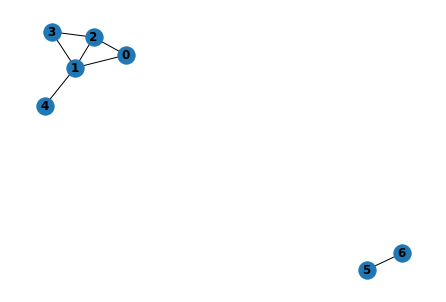

In [2]:
# Plotting the graph using matplotlib
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, font_weight='bold')
#plt.savefig ( "simple_graph.png" )

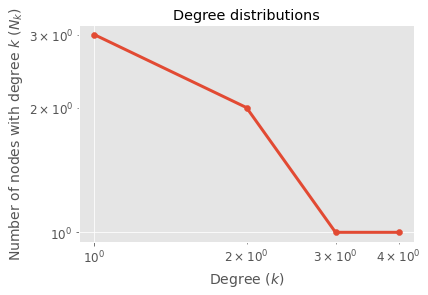

In [9]:
Degree_Distribution(G)

Largest component # 1
Number of vertices: 5  ( 71.42857142857143 ) 
Number of edges:  6 

Largest component # 2
Number of vertices: 2  ( 28.57142857142857 ) 
Number of edges:  1 



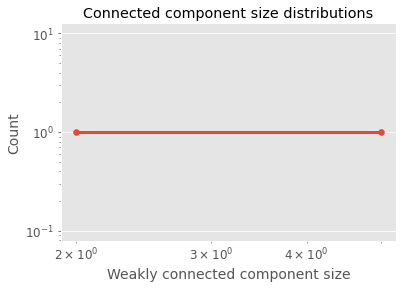

In [9]:
CC_Distribution(G)

Average clustering coefficient:  0.42857142857142855


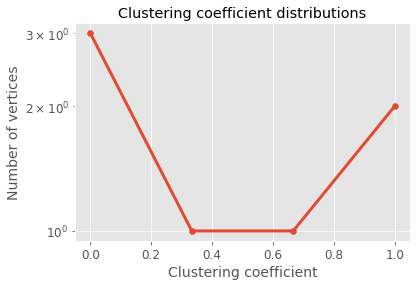

In [10]:
Clustering_Analysis(G)

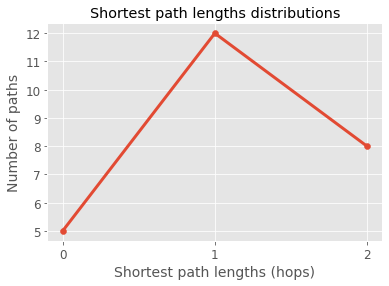

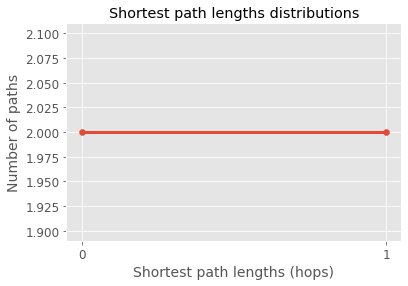

In [11]:
ShortestPaths_Analysis(G)

Largest component # 1
Number of vertices: 5  ( 71.42857142857143 ) 
Number of edges:  6 

Largest component # 2
Number of vertices: 2  ( 28.57142857142857 ) 
Number of edges:  1 

Average clustering coefficient:  0.42857142857142855


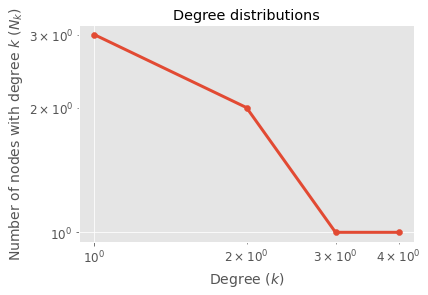

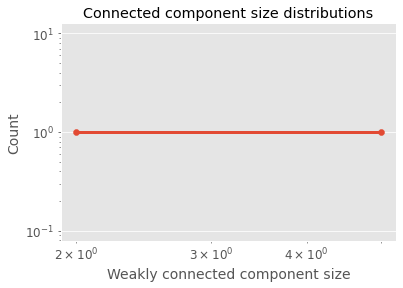

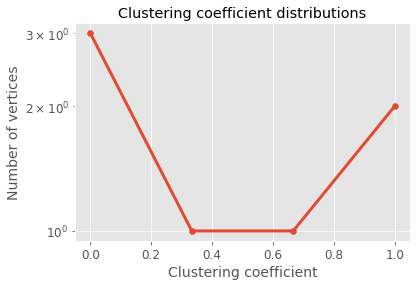

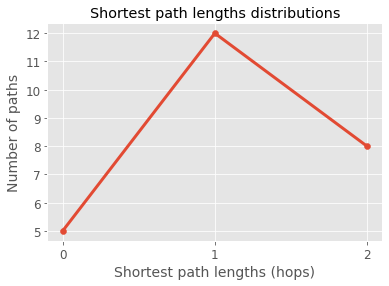

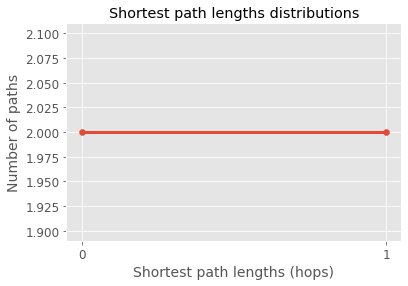

In [12]:
Degree_Distribution(G)
CC_Distribution(G)
Clustering_Analysis(G)
ShortestPaths_Analysis(G)


# Experiment with a hyperlink graph

In [13]:
file='web-Google.txt'
google = nx.read_adjlist (file)
n = google.number_of_nodes()
m = google.number_of_edges()
print("Number of vertices in web-Google:", n, "\nNumber of edges in web-Google: ", m)

Number of vertices in web-Google: 875713 
Number of edges in web-Google:  4322051


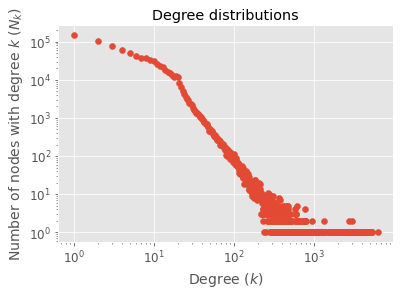

In [22]:
Degree_Distribution(google)


Largest component # 1
Number of vertices: 855802  ( 97.72630987549574 ) 
Number of edges:  4291352 

Largest component # 2
Number of vertices: 404  ( 0.04613383608556685 ) 
Number of edges:  403 

Largest component # 3
Number of vertices: 384  ( 0.04384998281400413 ) 
Number of edges:  980 

Largest component # 4
Number of vertices: 319  ( 0.03642745968142531 ) 
Number of edges:  318 

Largest component # 5
Number of vertices: 253  ( 0.028890743885268345 ) 
Number of edges:  1072 



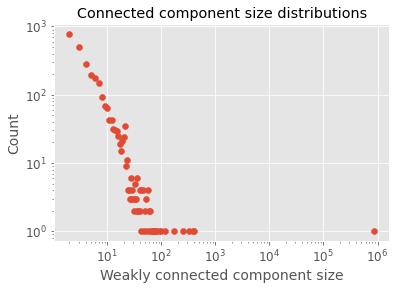

In [23]:
CC_Distribution(google)


Average clustering coefficient:  0.5142961475354184


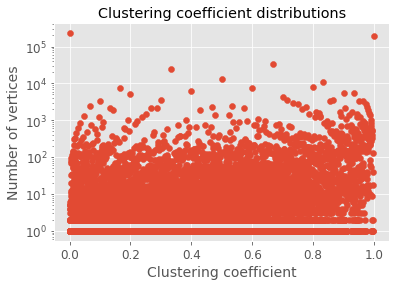

In [13]:
Clustering_Analysis(google)

This component is too large. Using ten single-source shortest paths.


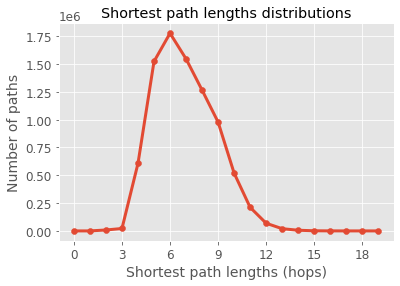

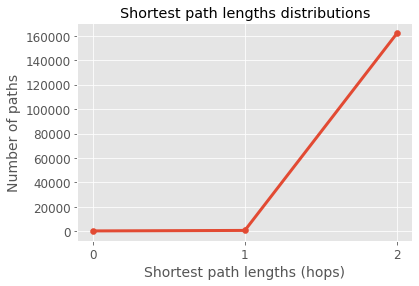

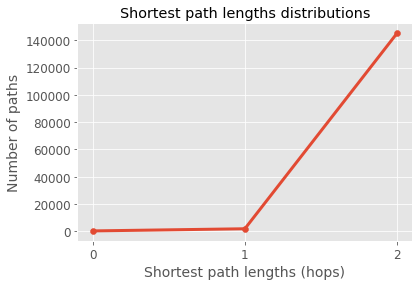

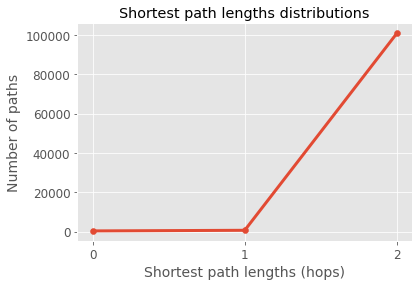

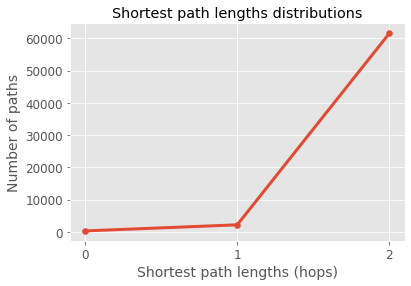

In [14]:
ShortestPaths_Analysis(google)